1) Importing necessary Libraries

In [58]:
import yfinance as yf

# Define the ticker symbol for Apple
ticker = 'AAPL'

# Download historical stock data from 2000 to 2020
data = yf.download(ticker, start='2000-01-01', end='2020-12-31')

# Display the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844004  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.772846  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.784155  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.716296  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.750226  460734400


In [59]:
# Save the data to a CSV file
data.to_csv('aapl_2000_2020.csv')

print("Data has been saved as 'aapl_2000_2020.csv'")

Data has been saved as 'aapl_2000_2020.csv'


2) Converting prices to returns

In [61]:
#Step 1 loading the data
data = pd.read_csv('aapl_2000_2020.csv', index_col='Date', parse_dates=True)

# Display the first few rows to confirm the data is loaded
print(data.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844004  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.772846  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.784155  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.716296  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.750226  460734400


In [62]:
# Calculate the simple returns using the 'Adj Close' column
data['Simple Return'] = data['Adj Close'].pct_change()

# Calculate the log returns using the 'Adj Close' column
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Display the first few rows with both returns
print(data[['Adj Close', 'Simple Return', 'Log Return']].head())


            Adj Close  Simple Return  Log Return
Date                                            
2000-01-03   0.844004            NaN         NaN
2000-01-04   0.772846      -0.084310   -0.088078
2000-01-05   0.784155       0.014633    0.014527
2000-01-06   0.716296      -0.086538   -0.090514
2000-01-07   0.750226       0.047369    0.046282


In [63]:
# Save the data with both returns to a new CSV file
data.to_csv('aapl_2000_2020_with_simple_and_log_returns.csv')

print("Data with both simple and log returns has been saved as 'aapl_2000_2020_with_simple_and_log_returns.csv'")


Data with both simple and log returns has been saved as 'aapl_2000_2020_with_simple_and_log_returns.csv'


Changing Frequency
This subtopic focuses on resampling data to different frequencies, such as converting daily data to monthly or weekly data. This is useful for summarizing and analyzing data over different time periods.

In [64]:
#Step 1 Resample the data to monthly frequency

# Resample the data to monthly frequency, taking the last observation of each month
monthly_data = data.resample('M').last()

# Display the first few rows of the monthly data
print(monthly_data.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2000-01-31  0.901786  0.927455  0.843750  0.926339   0.782270  701680000   
2000-02-29  1.013951  1.046875  1.005022  1.023438   0.864268  368961600   
2000-03-31  1.137835  1.225446  1.125000  1.212612   1.024021  404633600   
2000-04-30  1.135045  1.138393  1.083147  1.107701   0.935426  249580800   
2000-05-31  0.775670  0.814732  0.748326  0.750000   0.633356  433507200   

            Simple Return  Log Return  
Date                                   
2000-01-31       0.020910    0.020695  
2000-02-29       0.012142    0.012069  
2000-03-31       0.080020    0.076979  
2000-04-30      -0.021203   -0.021431  
2000-05-31      -0.040685   -0.041536  


C:\Users\FREDDY\AppData\Local\Temp\ipykernel_11072\4176412655.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


In [65]:
# Resample the data to weekly frequency, taking the last observation of each week
weekly_data = data.resample('W').last()

# Display the first few rows of the weekly data
print(weekly_data.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2000-01-09  0.861607  0.901786  0.852679  0.888393   0.750226  460734400   
2000-01-16  0.892857  0.912946  0.887277  0.896763   0.757294  390376000   
2000-01-23  1.020089  1.020089  0.983817  0.993862   0.839292  495924800   
2000-01-30  0.965960  0.989955  0.898438  0.907366   0.766248  423348800   
2000-02-06  0.928013  0.982143  0.925223  0.964286   0.814316  425320000   

            Simple Return  Log Return  
Date                                   
2000-01-09       0.047369    0.046282  
2000-01-16       0.038113    0.037405  
2000-01-23      -0.019273   -0.019461  
2000-01-30      -0.076137   -0.079191  
2000-02-06       0.045373    0.044373  


## Importance of Changing Frequency in Time Series Analysis

Changing the frequency of time series data is a crucial aspect of time series analysis and financial modeling. It involves converting data from one time frequency to another, such as from daily to monthly or weekly. This process allows analysts to summarize, aggregate, and analyze data at different granularities, which can reveal different insights and help in making more informed decisions.

Why Change Frequency?
1. Data Aggregation and Summarization
Reducing Data Volume: By aggregating data from daily to weekly or monthly frequencies, analysts can reduce the volume of data, making it easier to handle and analyze.
Overview and Trends: Aggregated data provides a clearer overview of long-term trends and patterns, which may be obscured in high-frequency data.
2. Noise Reduction
Smoothing: High-frequency data, such as daily stock prices, can be very volatile. Resampling to a lower frequency (e.g., monthly) helps smooth out short-term fluctuations and highlights underlying trends.
3. Comparative Analysis
Comparing Periods: Changing frequency allows for comparison across different periods. For example, monthly data can be compared across years to analyze yearly trends.
Seasonal Patterns: Resampling can help identify and analyze seasonal patterns by aggregating data into consistent time periods.
4. Financial and Economic Analysis
Volatility Analysis: In finance, monthly or yearly data is often used to analyze volatility and perform risk assessments. Daily data may be too noisy for such analyses.
Economic Indicators: Economic indicators, such as GDP growth rates, are often reported on a quarterly or annual basis. Changing the frequency of financial data can help align it with these indicators for comparative studies.
5. Improving Model Performance
Model Training: Some models perform better with aggregated data due to reduced noise. Changing the frequency can help improve model accuracy and performance.
Feature Engineering: Resampled data can be used to create new features for machine learning models, such as monthly averages or quarterly returns.
How to Change Frequency?
Resampling: Use functions like resample() in pandas to change the frequency of your time series data. Common frequencies include:

'D' for daily
'W' for weekly
'M' for monthly
'Q' for quarterly
'A' for annually
Aggregation Methods: Choose appropriate aggregation methods such as mean, sum, or last observation depending on the analysis requirements.

Changing the frequency of your time series data is a powerful tool for data analysis and can provide valuable insights that are not apparent in the original high-frequency data.


4. #Visualizing Time Series Data


Visualizing time series data is crucial for understanding trends, patterns, and anomalies in the data. We’ll use different plotting techniques to create visualizations of the time series data.

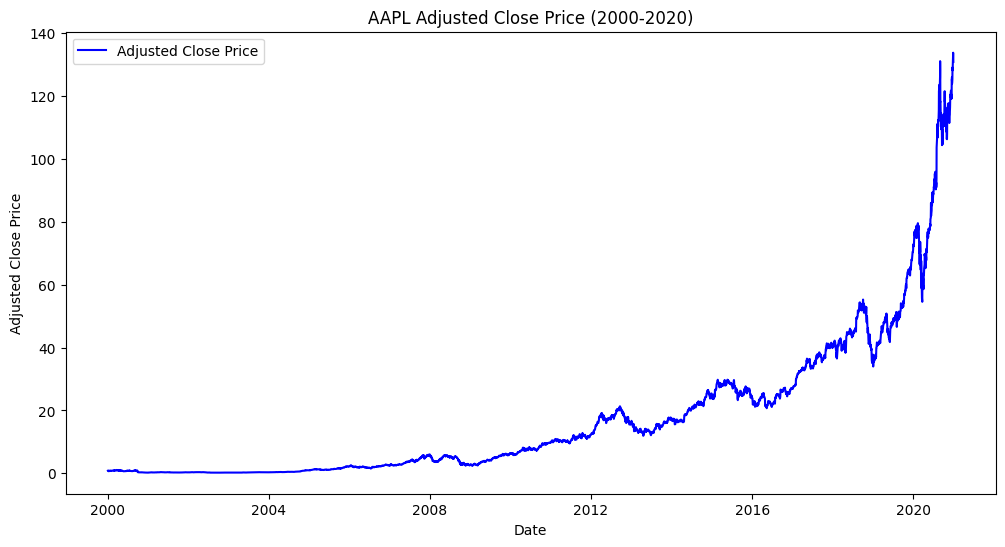

In [68]:
# Plotting with Matplotlib
#Basic Line Plot of Adjusted Close Prices

import matplotlib.pyplot as plt

# Plot Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('AAPL Adjusted Close Price (2000-2020)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.show()


In [69]:
#Step 3: Plotting with Plotly
import plotly.graph_objects as go

# Create an interactive line plot for Adjusted Close Prices
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Adjusted Close Price'))

fig.update_layout(title='AAPL Adjusted Close Price (2000-2020)',
                  xaxis_title='Date',
                  yaxis_title='Adjusted Close Price',
                  template='plotly_dark')

fig.show()


5.  Identifying Outliers
Identifying outliers in time series data is

In [72]:
#Using Z-Scores
from scipy import stats

# Calculate Z-scores for the Adjusted Close Prices
data['Z-Score'] = stats.zscore(data['Adj Close'])

# Identify outliers as those with Z-scores greater than a threshold (e.g., 3)
outliers_zscore = data[data['Z-Score'].abs() > 3]

# Display the outliers
print(outliers_zscore[['Adj Close', 'Z-Score']])




             Adj Close   Z-Score
Date                            
2020-06-22   87.518150  3.040438
2020-06-23   89.386215  3.121353
2020-06-24   87.808365  3.053008
2020-06-25   88.974075  3.103501
2020-06-29   88.227821  3.071177
...                ...       ...
2020-12-23  128.200760  4.802604
2020-12-24  129.189499  4.845431
2020-12-28  133.810089  5.045572
2020-12-29  132.028412  4.968398
2020-12-30  130.902634  4.919635

[133 rows x 2 columns]


In [73]:
#Using IQR (Interquartile Range
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Adj Close'].quantile(0.25)
Q3 = data['Adj Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers_iqr = data[(data['Adj Close'] < lower_bound) | (data['Adj Close'] > upper_bound)]

# Display the outliers
print(outliers_iqr[['Adj Close']])


             Adj Close
Date                  
2019-11-01   61.885674
2019-11-04   62.292084
2019-11-05   62.202572
2019-11-06   62.229195
2019-11-07   62.947384
...                ...
2020-12-23  128.200760
2020-12-24  129.189499
2020-12-28  133.810089
2020-12-29  132.028412
2020-12-30  130.902634

[281 rows x 1 columns]


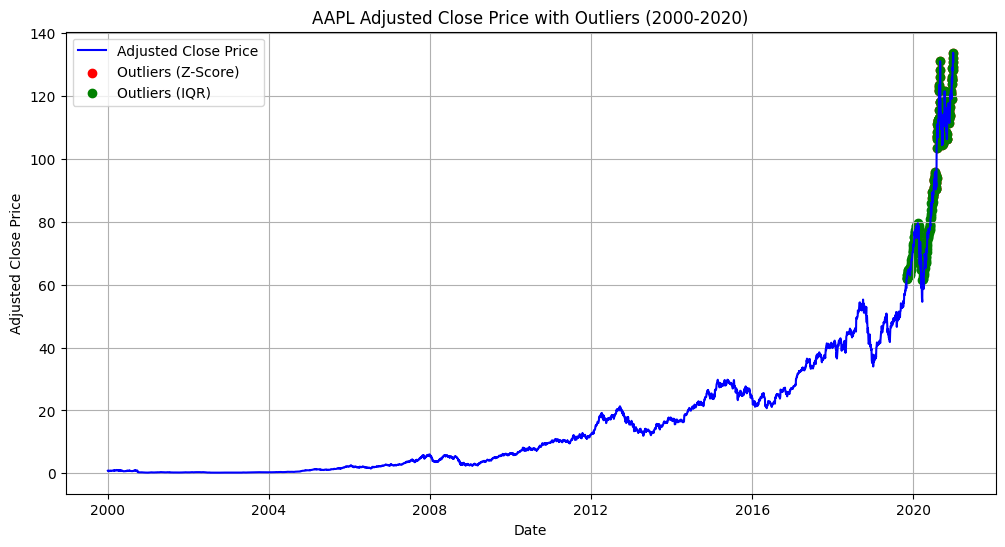

In [75]:
# Visualise the outliers
import matplotlib.pyplot as plt

# Plot Adjusted Close Prices with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.scatter(outliers_zscore.index, outliers_zscore['Adj Close'], color='red', label='Outliers (Z-Score)')
plt.scatter(outliers_iqr.index, outliers_iqr['Adj Close'], color='green', label='Outliers (IQR)')
plt.title('AAPL Adjusted Close Price with Outliers (2000-2020)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()




6. Investigating Stylized Facts of Asset Returns

Stylized facts are empirical properties of financial time series data that are commonly observed across different markets and assets. Investigating these facts helps in understanding the behavior of asset returns. Here are some key stylized facts of asset returns and how to investigate them:

Key Stylized Facts to Investigate:

Non-Gaussian Distribution of Returns

Volatility Clustering

Absence of Autocorrelation in Returns

Small and Decreasing Autocorrelation in Squared/Absolute

Returns

Leverage Effec

In [86]:
 # 1 ) Nongausian distribution

In [80]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('AAPL_data.csv', index_col='Date', parse_dates=True)

# Display the first few rows of the dataset
print(data.head())


            adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.844004         NaN       NaN
2000-01-04   0.772846   -0.084310 -0.088077
2000-01-05   0.784155    0.014633  0.014527
2000-01-06   0.716296   -0.086539 -0.090514
2000-01-07   0.750226    0.047369  0.046281


In [82]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('AAPL_data.csv', index_col='Date', parse_dates=True)

# Rename the column 'Adj Close' to 'adj_close'
data.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# Display the first few rows of the dataset
print(data.head())


            adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.844004         NaN       NaN
2000-01-04   0.772846   -0.084310 -0.088077
2000-01-05   0.784155    0.014633  0.014527
2000-01-06   0.716296   -0.086539 -0.090514
2000-01-07   0.750226    0.047369  0.046281


In [83]:
# Calculate daily returns
data['Daily Return'] = data['adj_close'].pct_change()

# Drop NaN values that may have been introduced by pct_change()
data = data.dropna()


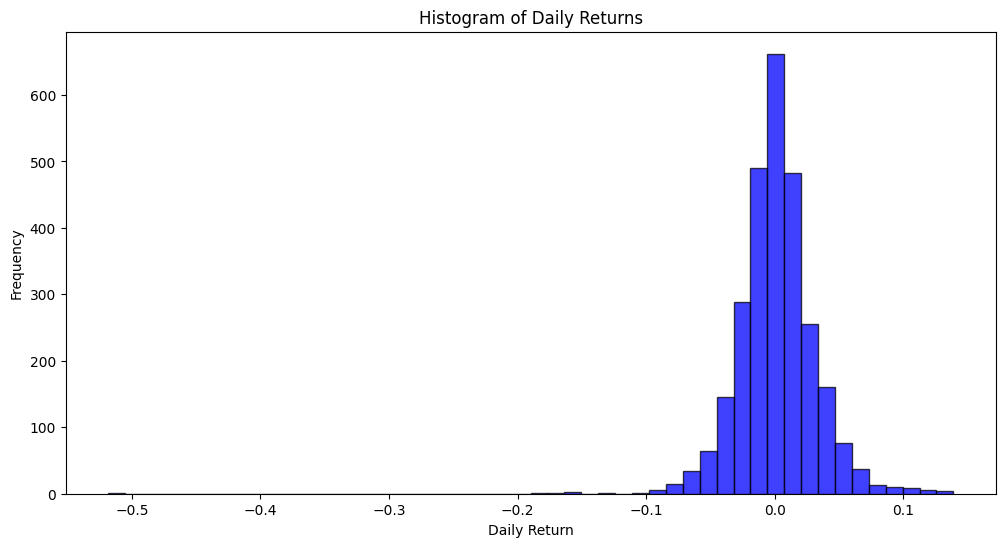

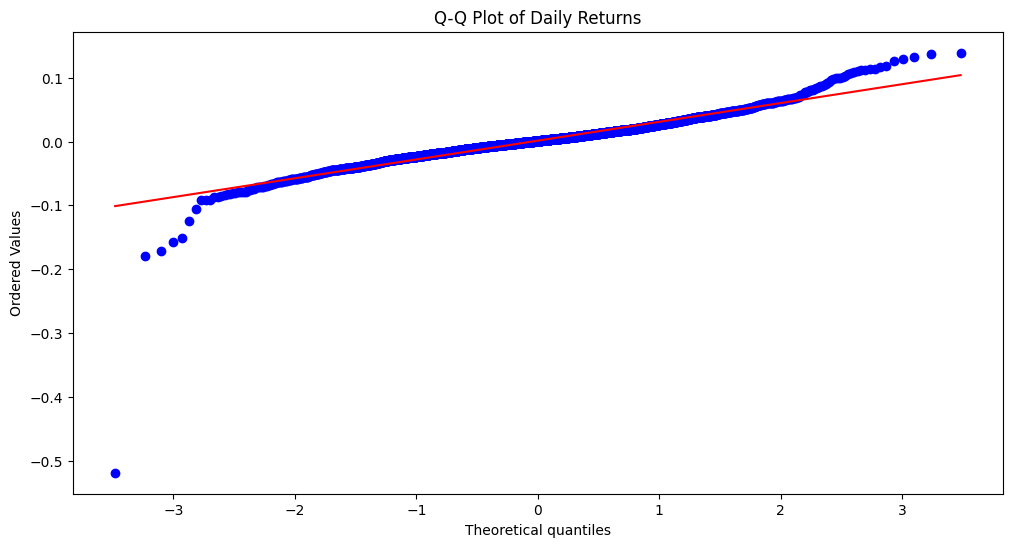

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot histogram of daily returns
plt.figure(figsize=(12, 6))
plt.hist(data['Daily Return'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot to check for normality
plt.figure(figsize=(12, 6))
stats.probplot(data['Daily Return'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily Returns')
plt.show()


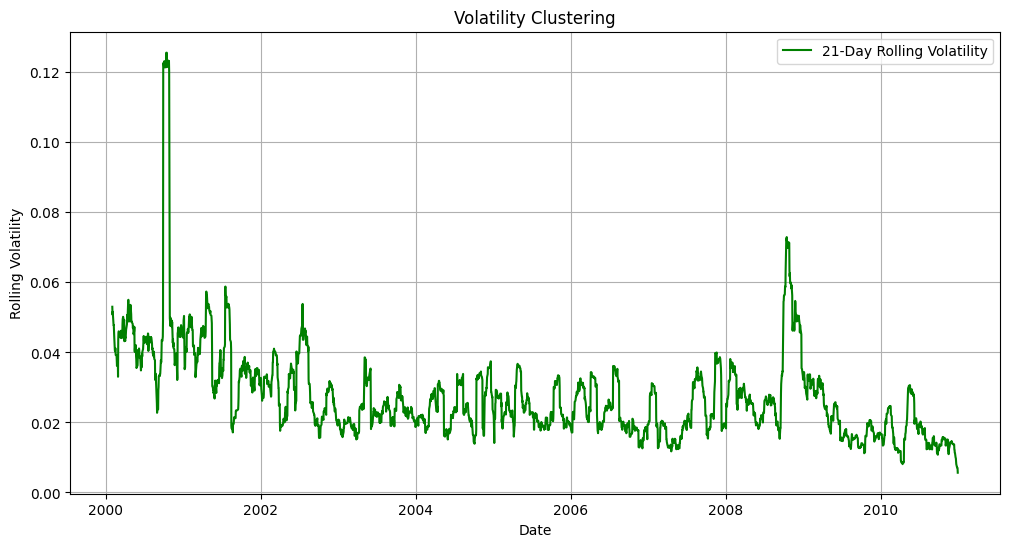

In [88]:
# 2) Volatility Clustering

# Calculate rolling standard deviation (volatility)
rolling_volatility = data['Daily Return'].rolling(window=21).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label='21-Day Rolling Volatility', color='green')
plt.title('Volatility Clustering')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.legend()
plt.grid(True)
plt.show()


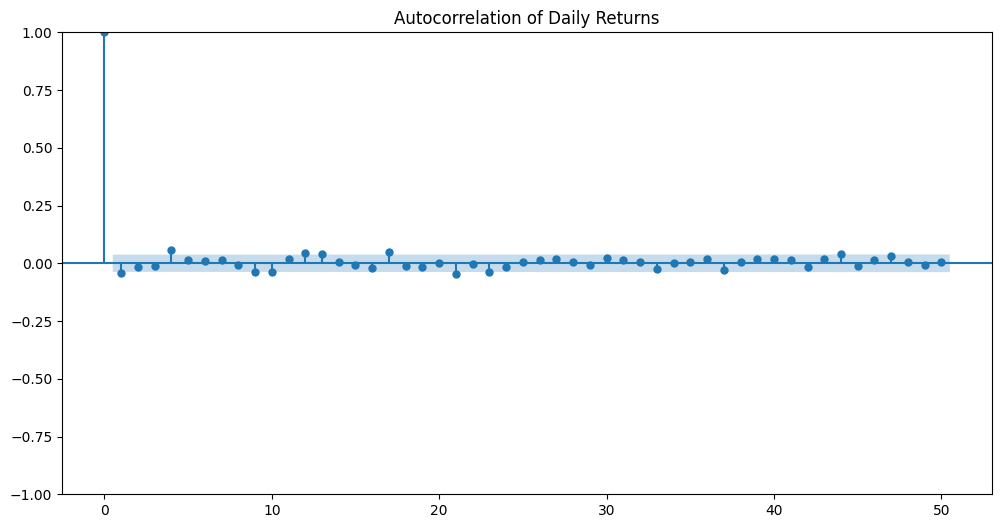

In [90]:
# 3) Absence of Autocorrelation in Returns

from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of daily returns
plt.figure(figsize=(12, 6))
plot_acf(data['Daily Return'], lags=50, ax=plt.gca())
plt.title('Autocorrelation of Daily Returns')
plt.show()


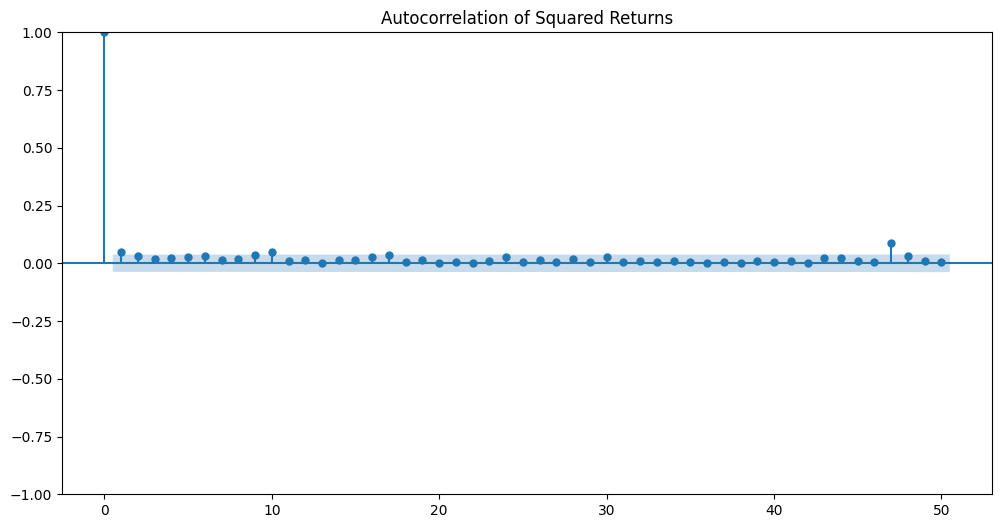

In [91]:
# 4. Small and Decreasing Autocorrelation in Squared/Absolute Returns
squared_returns = data['Daily Return'] ** 2

plt.figure(figsize=(12, 6))
plot_acf(squared_returns, lags=50, ax=plt.gca())
plt.title('Autocorrelation of Squared Returns')
plt.show()


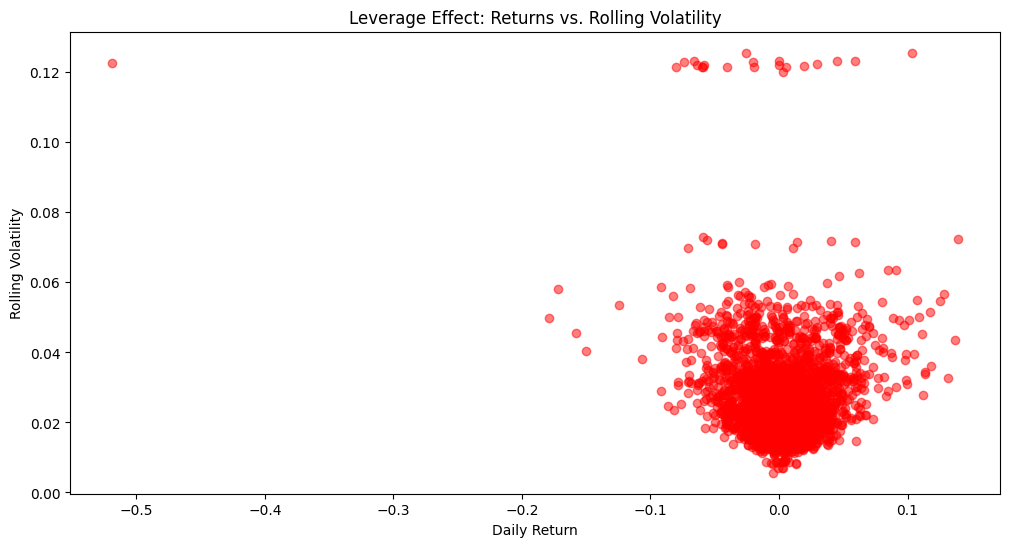

In [92]:
# 5. Leverage Effect
plt.figure(figsize=(12, 6))
plt.scatter(data['Daily Return'], rolling_volatility, alpha=0.5, color='red')
plt.title('Leverage Effect: Returns vs. Rolling Volatility')
plt.xlabel('Daily Return')
plt.ylabel('Rolling Volatility')
plt.show()